# Exploring Developer Trends on Stack Overflow 2024

This project analyzes survey data from Stack Overflow's 2024 Developer Survey. The goal is to explore patterns in tools usage, AI adoption, education background, and experience among developers and learners.


In [16]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/survey_results_public.csv')

# 1 Display the first 5 rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Exploratory Data Analysis (EDA)


In [17]:
# 2. Show basic info
print("\nDataset Info:")
print(df.info())

# 3. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 4. Basic statistics
print("\nDescriptive statistics:")
print(df.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Missing values per column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Descriptive statistics:
          ResponseId                      MainBranch              Age  \
count   65437.000000                           65437            65437   
unique           NaN                               5                8   
top              NaN  I am a developer by profession  25-34 years old   
freq             NaN                           50207            23911   
mean    32719.000000            

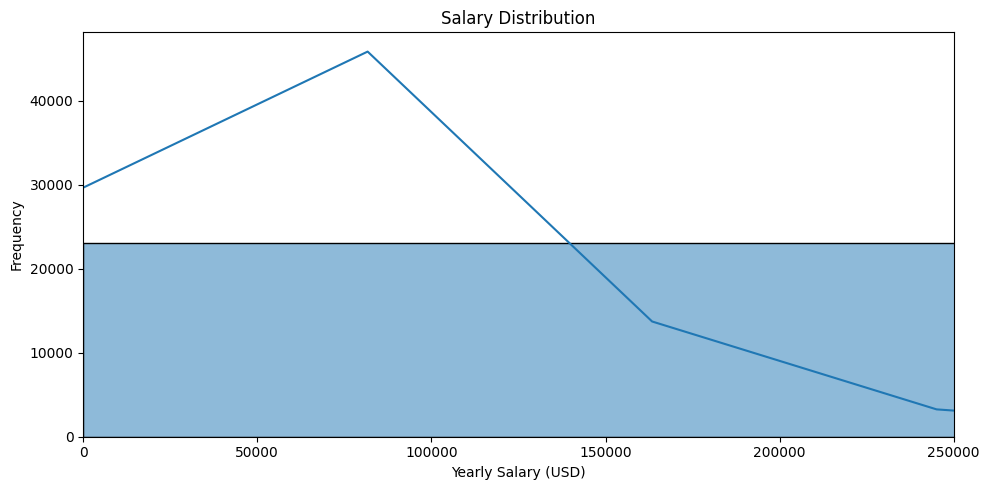

In [18]:
# 5. Distribution of salaries
plt.figure(figsize=(10,5))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Frequency')
plt.xlim(0, 250000)  # Remove extreme outliers for better view
plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['YearsCode']
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    ('scaler', StandardScaler(), numeric_cols)
])


<ipython-input-20-864924192>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


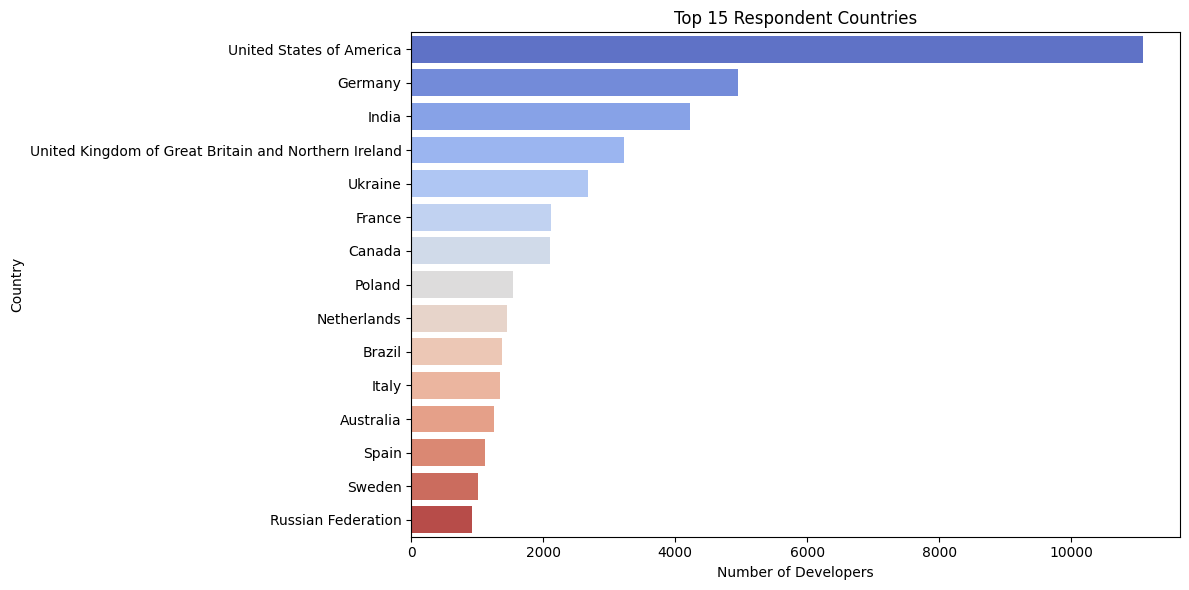

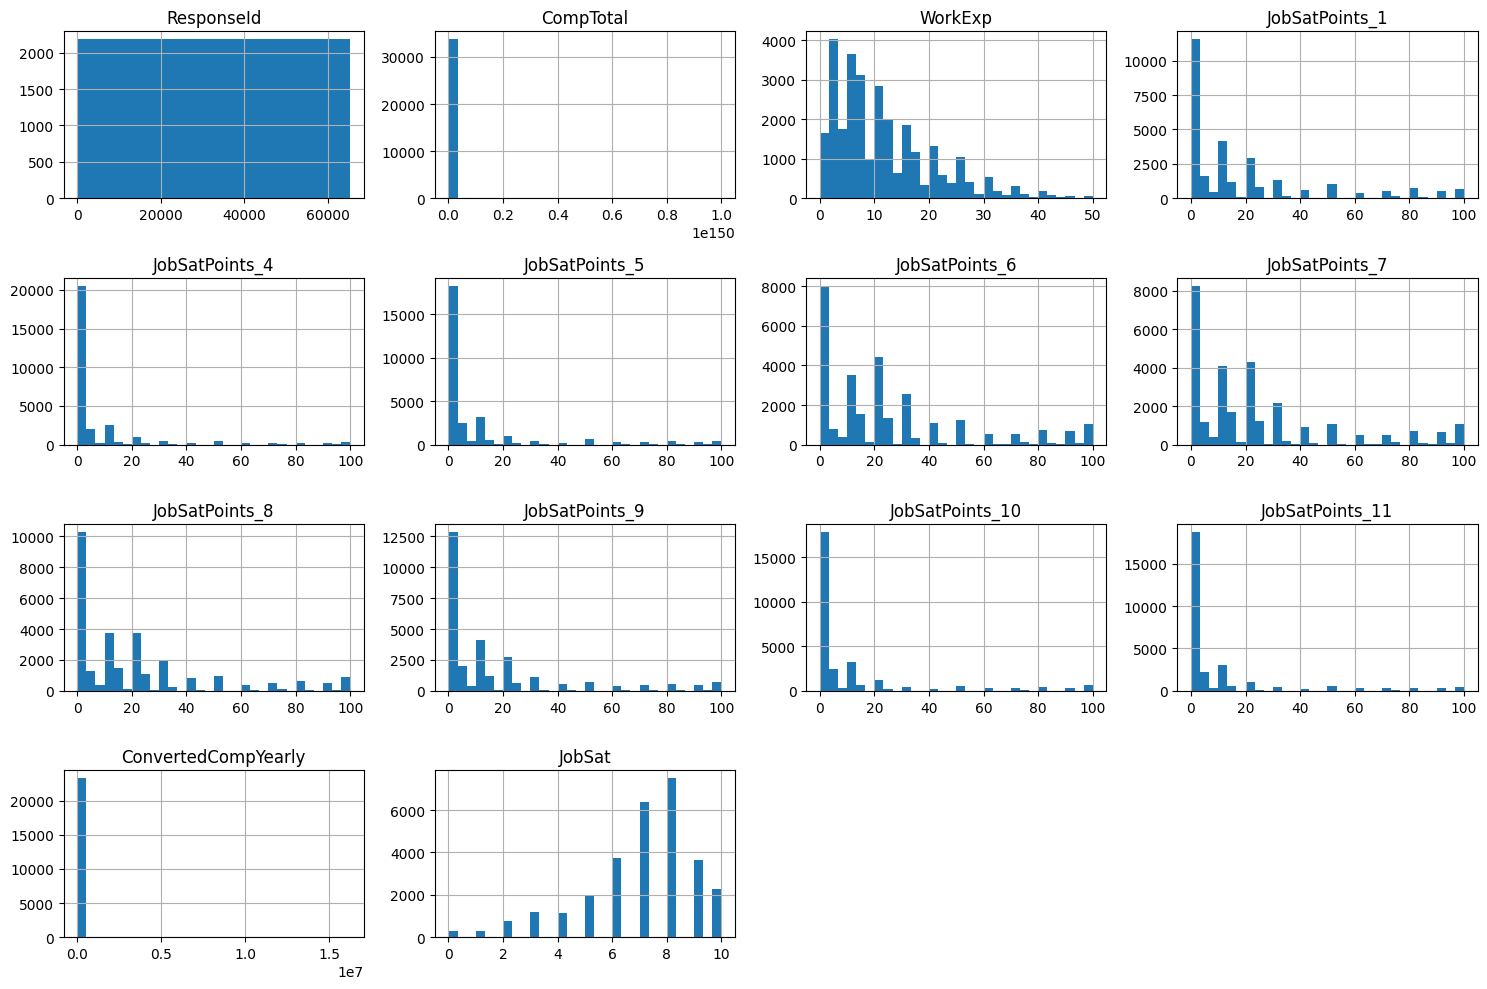

In [20]:
# 6. Count of developers by country (top 15)
plt.figure(figsize=(12,6))
top_countries = df['Country'].value_counts().head(15)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 15 Respondent Countries')
plt.xlabel('Number of Developers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
# Distribution of numerical variables
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


## Business Questions

1. What are the most desired development tools among developers?**  
   Identify which tools developers are most interested in working with to understand current trends in the software industry.

2. Do learning sources differ between professional developers and those learning to code?**  
   Explore how learning preferences vary based on experience level, and whether professionals and beginners use different platforms or resources.

3. Is there a difference in AI tool usage between professionals and learners?  
   Analyze the adoption of AI tools across user types to determine how experience affects engagement with emerging technologies.

4. Is there a relationship between education level and coding experience?**  
   Examine whether higher educational attainment correlates with more years of coding experience among developers.


###Most Desired Developer Tools
This section explores the most desired developer tools based on survey responses. The analysis reveals which tools developers are most interested in working with, providing insight into current industry trends.

<ipython-input-21-374363694>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tools.values, y=top_tools.index, palette='coolwarm')


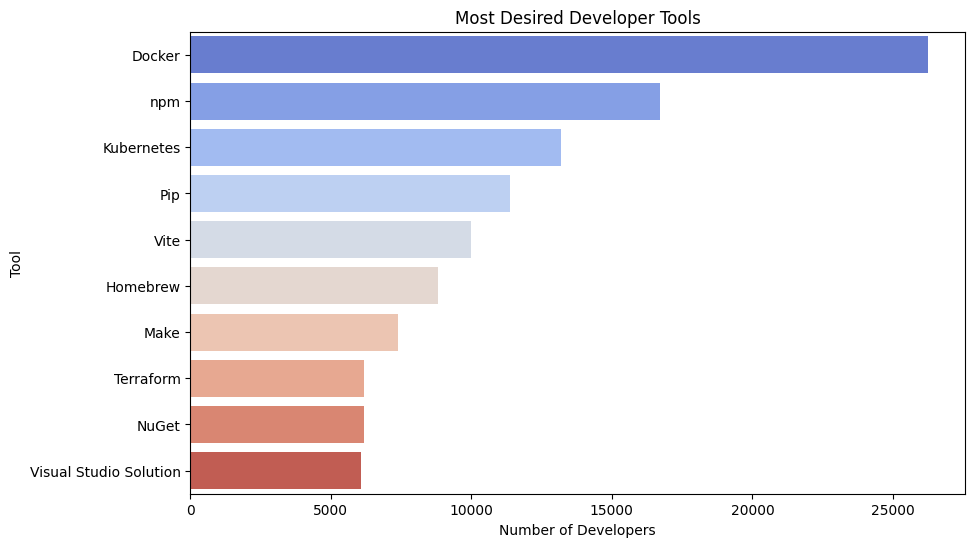

In [21]:
# Select the column related to tools developers want to work with and drop missing values
tools_df = df[['ToolsTechWantToWorkWith']].dropna()

# Split the semicolon-separated tool lists and flatten the result into one long list
all_tools = tools_df['ToolsTechWantToWorkWith'].str.split(';').explode().str.strip()

# Count how many times each tool appears and select the top 10
top_tools = all_tools.value_counts().head(10)

# Plot a horizontal bar chart of the top 10 most desired tools
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tools.values, y=top_tools.index, palette='coolwarm')
plt.title('Most Desired Developer Tools')
plt.xlabel('Number of Developers')
plt.ylabel('Tool')
plt.show()


Insight:
The chart shows that Docker, npm, and Kubernetes are the most desired tools among developers. These tools play a critical role in modern software development, especially in areas such as DevOps, package management, and container orchestration. The popularity of these technologies indicates a strong interest in scalable, efficient, and automated development environments.

###Learning Source Preferences by Experience Level
This section compares the online learning sources used by two distinct groups of developers: professionals and those currently learning to code.

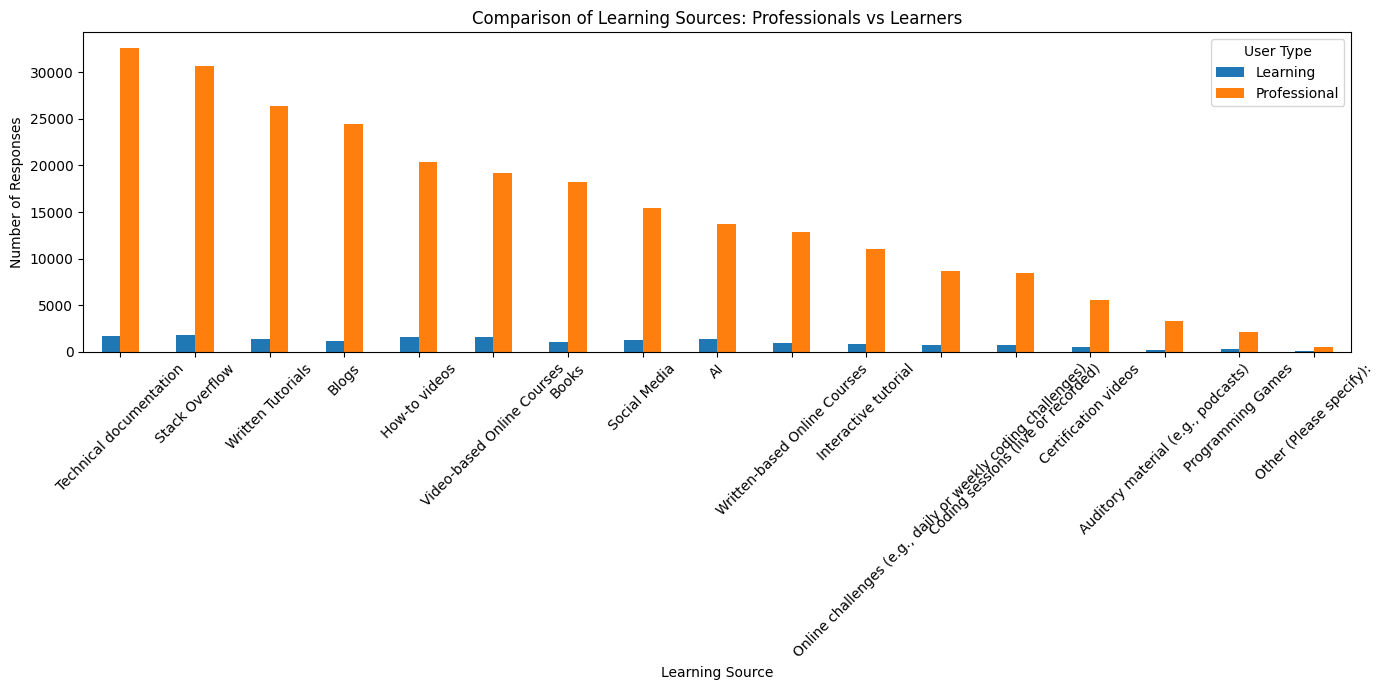

In [22]:
# Create a subset with only the relevant columns and remove missing values
learn_df = df[['MainBranch', 'LearnCodeOnline']].dropna()

# Classify respondents as either Professionals or Learners
def categorize_user(x):
    if 'I am a developer by profession' in x:
        return 'Professional'
    elif 'I am learning to code' in x:
        return 'Learning'
    else:
        return 'Other'

learn_df['UserType'] = learn_df['MainBranch'].apply(categorize_user)

# Keep only Professionals and Learners for comparison
learn_df = learn_df[learn_df['UserType'].isin(['Professional', 'Learning'])]

# Split the semicolon-separated list of sources for each user
exploded = learn_df.assign(Source=learn_df['LearnCodeOnline'].str.split(';')).explode('Source')

# Clean whitespace from the source entries
exploded['Source'] = exploded['Source'].str.strip()

# Count each learning source per user type
source_counts = exploded.groupby(['UserType', 'Source']).size().unstack(fill_value=0)

# Plot the comparison
source_counts.T.sort_values(by='Professional', ascending=False).plot(kind='bar', figsize=(14,7))
plt.title('Comparison of Learning Sources: Professionals vs Learners')
plt.xlabel('Learning Source')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


Insight:
The results reveal clear differences in learning preferences between professionals and learners. Professionals tend to rely more on self-guided resources like documentation, Stack Overflow, and written tutorials, reflecting their familiarity with independent learning. On the other hand, learners are more engaged with structured, visual formats such as online courses and interactive platforms. These patterns suggest that experience level plays a significant role in shaping how developers approach learning and skill development.

###Adoption of AI Tools by Developer Type
This section examines the adoption of AI tools (e.g., code assistants, writing tools, and general AI applications) among different developer groups. It aims to determine whether experience level affects AI tool usage patterns.

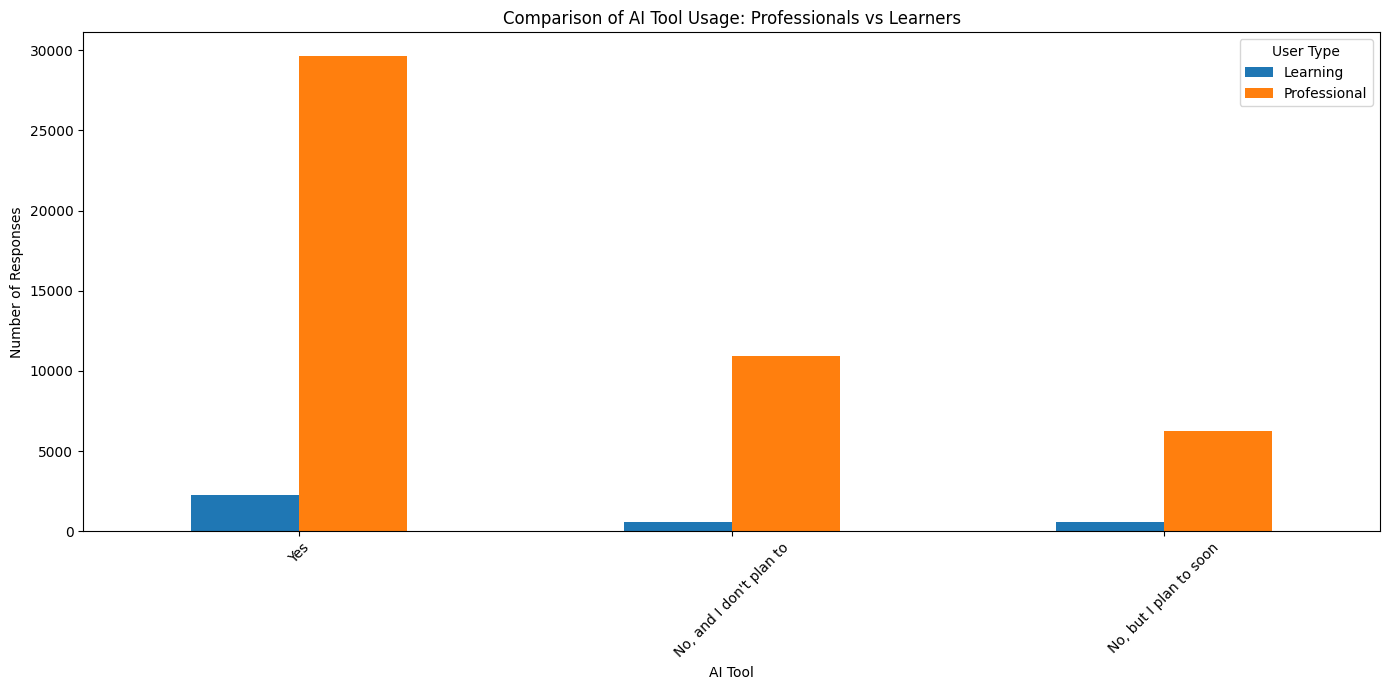

In [23]:
# Select only the relevant columns and remove rows with missing values
ai_df = df[['MainBranch', 'AISelect']].dropna()

# Classify users as either 'Professional' or 'Learning'
ai_df['UserType'] = ai_df['MainBranch'].apply(categorize_user)

# Keep only Professionals and Learners
ai_df = ai_df[ai_df['UserType'].isin(['Professional', 'Learning'])]

# Split multiple selected AI tools into separate rows
exploded_ai = ai_df.assign(Tool=ai_df['AISelect'].str.split(';')).explode('Tool')

# Remove extra spaces
exploded_ai['Tool'] = exploded_ai['Tool'].str.strip()

# Count each tool usage per user type
ai_tool_counts = exploded_ai.groupby(['UserType', 'Tool']).size().unstack(fill_value=0)

# Plot the result
ai_tool_counts.T.sort_values(by='Professional', ascending=False).plot(kind='bar', figsize=(14,7))
plt.title('Comparison of AI Tool Usage: Professionals vs Learners')
plt.xlabel('AI Tool')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


Insight:
The analysis shows that professional developers are significantly more engaged in using AI tools compared to learners. Tools such as AI code assistants and writing aids are widely adopted among professionals, reflecting their integration into modern workflows. While learners also experiment with these tools, their adoption rate is notably lower—possibly due to limited exposure or practical needs. This trend emphasizes that AI tools are becoming essential in professional development environments, whereas learners are still in the exploration phase.

###Years of Experience vs Education Level
This section investigates whether individuals with higher educational degrees tend to have more coding experience.

<ipython-input-24-1412384800>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_exp.values, y=avg_exp.index, palette='viridis')


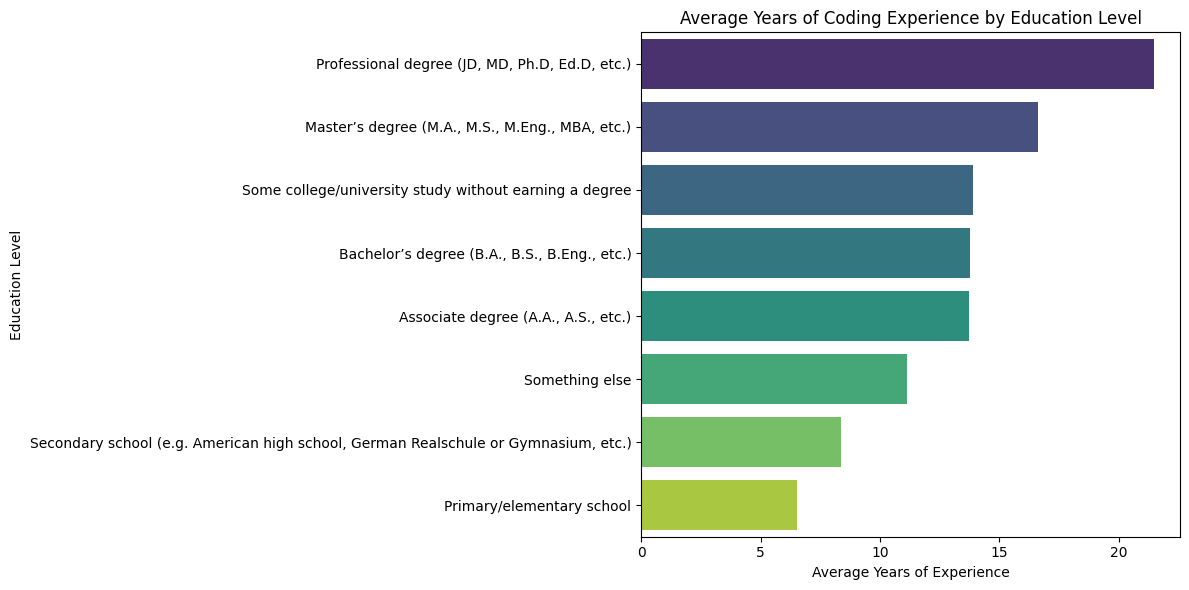

In [24]:
# Select relevant columns and drop rows with missing values
edu_exp_df = df[['EdLevel', 'YearsCode']].dropna()

# Convert experience values from text to numeric
def convert_experience(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return None

edu_exp_df['YearsCode'] = edu_exp_df['YearsCode'].apply(convert_experience)
edu_exp_df = edu_exp_df.dropna()

# Group data by education level and calculate the average years of experience
avg_exp = edu_exp_df.groupby('EdLevel')['YearsCode'].mean().sort_values(ascending=False)

# Plot a bar chart of average experience per education level
plt.figure(figsize=(12,6))
sns.barplot(x=avg_exp.values, y=avg_exp.index, palette='viridis')
plt.title('Average Years of Coding Experience by Education Level')
plt.xlabel('Average Years of Experience')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()


Insight:
The analysis reveals that developers with higher education levels (such as Master's and Doctoral degrees) tend to report more years of coding experience on average. However, this is not a strict rule—many individuals with lower formal education also demonstrate significant experience. This suggests that while education may support deeper engagement in the field, hands-on practice and independent learning also play major roles in developing expertise.

## Predicting Developer Salaries Based on Experience and Demographics


In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Select relevant columns and drop missing values
model_df = df[['Country', 'EdLevel', 'YearsCode', 'Employment', 'ConvertedCompYearly']].dropna()

# Convert YearsCode strings to numeric values
def convert_experience(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return None

model_df['YearsCode'] = model_df['YearsCode'].apply(convert_experience)
model_df = model_df.dropna()

# Remove extreme salary outliers
model_df = model_df[model_df['ConvertedCompYearly'] <= 250000]

# Simplify the Country feature: keep top 10 countries, group others as 'Other'
top_countries = model_df['Country'].value_counts().head(10).index
model_df['Country'] = model_df['Country'].apply(lambda x: x if x in top_countries else 'Other')

# Apply log transformation to target variable for normalization
model_df['LogSalary'] = np.log1p(model_df['ConvertedCompYearly'])

# Define features and target
X = model_df[['Country', 'EdLevel', 'Employment', 'YearsCode']]
y = model_df['LogSalary']

# Identify categorical and numerical columns
categorical = ['Country', 'EdLevel', 'Employment']
numerical = ['YearsCode']

# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numerical)
])

# Create full pipeline with Linear Regression
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 1.23
R-squared Score: 0.33


### Model Evaluation Summary

The model achieved a **Mean Squared Error of 1.23** and an **R-squared score of 0.33** on the test set.  
This means that around 33% of the variance in the log-transformed salary can be explained by the model.

While this indicates moderate predictive power, the performance could likely be improved by:

- Using more complex models such as Random Forest or Gradient Boosting.
- Engineering more features like job role, company size, or tech stack.
- Balancing the dataset or applying advanced regularization techniques.

Still, the Linear Regression model provided some useful insights into how experience, education level, country, and employment type relate to developer salaries.
